次数为：20
次数为：40
次数为：60
次数为：80
次数为：100
总共花费时长为： 0.07046270370483398


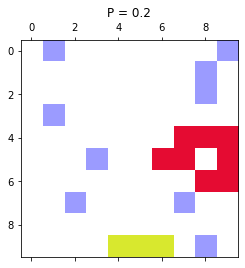

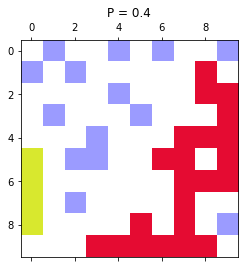

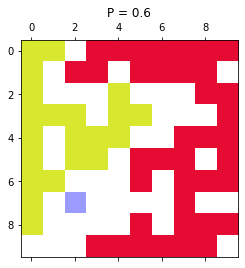

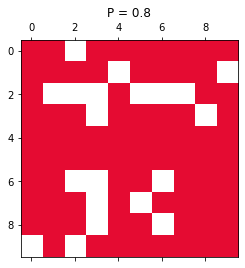

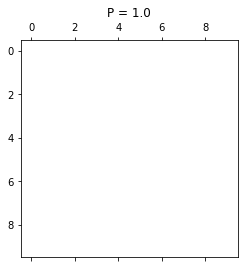

In [3]:

import random
import numpy as np
import time
from scipy.ndimage import measurements
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc", size=20)

import statsmodels.api as sm

import pylab
from matplotlib.pyplot import *




class QuickFindUF:
    def __init__(self, n):
        self.count = n
        self.size = [1 for i in range(n)]
        self.parent = [i for i in range(n)]
                                             

    def connected(self, p, q):
        self.validate(p)
        self.validate(q)
        return self.find(p) == self.find(q)

    def find(self, p):  # 找根节点  

        if (p == self.parent[p]): #此时p为根节点
            return p#返回该结合的根节点


        else :
            self.parent[p]=self.find(self.parent[p])#通过递归调用find（parent[p])来向上访问元素，并且把找到的根元素赋值给节点的父亲指针
            return self.parent[p]

    def validate(self, p):              # 自定义一个参数校验函数
        n = len(self.size)               # len(列表变量的名称）：可以统计列表中元素的总数
        if (p < 0 or p >= n):
            raise Exception('Out of range!')         # 超出范围

    def union(self, p, q):  # 判断p和 q的根节点是否相连，不相连就把他们的根节点连起来
        self.validate(p)
        self.validate(q)
        rootP = self.find(p)  # 找到节点p的根节点rootp
        rootQ = self.find(q)  # 找到节点q的根节点rootq
        if rootP == rootQ:  # 判断两个根节点是否相同，不相同则证明p q不相连
            return
        if self.size[rootP] < self.size[rootQ]:
            self.parent[rootP] = rootQ
            self.size[rootQ] = self.size[rootQ] + self.size[rootP]
        else:
            self.parent[rootQ] = rootP
            self.size[rootP] = self.size[rootP] + self.size[rootQ]


class Percolation:        # 渗流  建立一个Percolation类，其中有一个 N×N 的二维数组，将开格记为1，闭格记为0，默认初始值均为0（全是闭格）。
    def __init__(self, N):
        self.Array = [[0 for i in range(N)] for j in range(N)]    #二维数组，创建一个N*N的矩阵，元素全为0
        self.size = N                   #  [0 for i in range(N)] 是n个0组成的列表 [1,1,...]和 x = [1] * n 一个效果
        self.UF = QuickFindUF(N * N + 2)    # 创一个N*N+2的一维数组存联通关系
        self.UF1 = QuickFindUF(N * N + 1) 

    def Open(self, i, j):        #最主要的函数就是open操作，其要考虑四周是否可以连接   检查坐标为(i, j)的点是否开启，如果没有开启，则将其开启
        if self.Array[i][j] == 1:  #此外，开启格子后，需要检查其上下左右的格子是否同样已经打开，如果已经打开，则通过union()方法将两个格子连通起来；
            return
        else:
            self.Array[i][j] = 1
          
            if i == 0:
                self.UF.union(0, i * self.size + j + 1)  
            if i != 0:
                if self.isOpen(i - 1, j):
                    self.UF.union(i * self.size + j + 1, (i - 1) * self.size + j + 1)
            if i != self.size - 1:
                if self.isOpen(i + 1, j):
                    self.UF.union(i * self.size + j + 1, (i + 1) * self.size + j + 1)
            if j != 0:
                if self.isOpen(i, j - 1):
                    self.UF.union(i * self.size + j + 1, i * self.size + j)
            if j != self.size - 1:
                if self.isOpen(i, j + 1):
                    self.UF.union(i * self.size + j + 1, i * self.size + j + 2)

    def isOpen(self, i, j):           #判断（i,j）这个格子是否打开，如果打开（即等于1），则return
        return self.Array[i][j] == 1
   
class solution:
    def __init__(self, im):
        self.im = im
        m, n = im.shape
        self.mask = [[0 for _ in range(n)] for _ in range(m)]

    def isValid(self, i, j, mask, im):
        m, n = im.shape
        return i >= 0 and i < m and j >= 0 and j < n and mask[i][j] == 0 and im[i][j] == 1

    def add(self, i, j, mask, im, q):
        if self.isValid(i, j, mask, im):
            q.append([i, j])
            self.mask[i][j] = 1

    def bsfsolver(self,im):

        m, n = self.im.shape
        res = []
        for i in range(m):
            for j in range(n):
                if self.mask[i][j] == 1 or self.im[i][j] == 0:
                    continue
                P, Q = list(), list()
                P.append([i, j])
                self.mask[i][j] = 1
                while P:
                    temp = P.pop(0)
                    Q.append(temp)
                    self.add(temp[0] - 1, temp[1], self.mask, im, P)
                    self.add(temp[0] + 1, temp[1], self.mask, im, P)
                    self.add(temp[0], temp[1] - 1, self.mask, im, P)
                    self.add(temp[0], temp[1] + 1, self.mask, im, P)
                res.append(Q)
        return res
   


class PercolationStats:  
    def __init__(self, N, T):    
        self.threshold = []    
        self.Meansize = []
        self.Groupnum = []
        self.Probability = []
        self.Maxsize = []
        self.times = T
        
        for k in range(T):
            experiment = Percolation(N)
            aq=experiment.Array

            count = 0   #定义整数变量用于记录循环次数（计数器）    # while循环：当条件满足时，在循环体内部不断的执行相同的操作。
            block_list = [i for i in range(N * N)]
            while block_list:    #不用在每次一个点打开的时候，每次都循环一遍所有的点，加入到block_list中

                # print("单个%s"%block_list)
               
                to_open = random.choice(block_list)  # 从列表中随机取一个元素
                tt = random.sample(block_list,20)
                tt1 = tt[0]
                tt2 = tt[1]
                tt3 = tt[2]
                tt4 = tt[3]
                tt5 = tt[4]
                tt6 = tt[5]
                tt7 = tt[6]
                tt8 = tt[7]
                tt9 = tt[8]
                tt10 = tt[9]
                tt11 = tt[10]
                tt12 = tt[11]
                tt13 = tt[12]
                tt14 = tt[13]
                tt15 = tt[14]
                tt16 = tt[15]
                tt17 = tt[16]
                tt18 = tt[17]
                tt19 = tt[18]
                tt20 = tt[19]
                # print("随机打开%s"%to_open)
                # print("单个%s" % block_list)
#                 to_open_j = int(to_open % N)
#                 to_open_i = int((to_open - to_open_j) / N)
#                 experiment.Open(to_open_i, to_open_j)
                
                to_open_j = int(tt1 % N)
                to_open_i = int((tt1 - to_open_j) / N)
                experiment.Open(to_open_i, to_open_j)
                
                to_open_j1 = int(tt2 % N)
                to_open_i1 = int((tt2 - to_open_j1) / N)
                experiment.Open(to_open_i1, to_open_j1)
                
                to_open_j2 = int(tt3 % N)
                to_open_i2 = int((tt3 - to_open_j2) / N)
                experiment.Open(to_open_i2, to_open_j2)
                
                to_open_j3 = int(tt4 % N)
                to_open_i3 = int((tt4 - to_open_j3) / N)
                experiment.Open(to_open_i3, to_open_j3)
                  
                to_open_j4 = int(tt5 % N)
                to_open_i4 = int((tt5 - to_open_j4) / N)
                experiment.Open(to_open_i4, to_open_j4)
                
                to_open_j5 = int(tt6 % N)
                to_open_i5 = int((tt6 - to_open_j5) / N)
                experiment.Open(to_open_i5, to_open_j5)
                
                to_open_j6 = int(tt7 % N)
                to_open_i6 = int((tt7 - to_open_j6) / N)
                experiment.Open(to_open_i6, to_open_j6)
                
                to_open_j7 = int(tt8 % N)
                to_open_i7 = int((tt8 - to_open_j7) / N)
                experiment.Open(to_open_i7, to_open_j7)
                  
                to_open_j8 = int(tt9 % N)
                to_open_i8 = int((tt9 - to_open_j8) / N)
                experiment.Open(to_open_i8, to_open_j8)
                
                to_open_j9 = int(tt10 % N)
                to_open_i9 = int((tt10 - to_open_j9) / N)
                experiment.Open(to_open_i9, to_open_j9)
                
                to_open_j10 = int(tt11 % N)
                to_open_i10 = int((tt11 - to_open_j10) / N)
                experiment.Open(to_open_i10, to_open_j10)
                
                to_open_j11 = int(tt12 % N)
                to_open_i11 = int((tt12 - to_open_j11) / N)
                experiment.Open(to_open_i11, to_open_j11)
                  
                to_open_j12 = int(tt13 % N)
                to_open_i12 = int((tt13 - to_open_j12) / N)
                experiment.Open(to_open_i12, to_open_j12)
                
                to_open_j13 = int(tt14 % N)
                to_open_i13 = int((tt14 - to_open_j13) / N)
                experiment.Open(to_open_i13, to_open_j13)
                
                to_open_j14 = int(tt15 % N)
                to_open_i14 = int((tt15 - to_open_j14) / N)
                experiment.Open(to_open_i14, to_open_j14)
                
                to_open_j15 = int(tt16 % N)
                to_open_i15 = int((tt16 - to_open_j15) / N)
                experiment.Open(to_open_i15, to_open_j15)
                  
                to_open_j16 = int(tt17 % N)
                to_open_i16 = int((tt17 - to_open_j16) / N)
                experiment.Open(to_open_i16, to_open_j16)
                
                to_open_j17 = int(tt18 % N)
                to_open_i17 = int((tt18 - to_open_j17) / N)
                experiment.Open(to_open_i17, to_open_j17)
                
                to_open_j18 = int(tt19 % N)
                to_open_i18 = int((tt19 - to_open_j18) / N)
                experiment.Open(to_open_i18, to_open_j18)
                
                to_open_j19 = int(tt20 % N)
                to_open_i19 = int((tt20 - to_open_j19) / N)
                experiment.Open(to_open_i19, to_open_j19)

                block_list.remove(tt1)
                block_list.remove(tt2)
                block_list.remove(tt3)
                block_list.remove(tt4)
                block_list.remove(tt5)
                block_list.remove(tt6)
                block_list.remove(tt7)
                block_list.remove(tt8)
                block_list.remove(tt9)
                block_list.remove(tt10)
                block_list.remove(tt11)
                block_list.remove(tt12)
                block_list.remove(tt13)
                block_list.remove(tt14)
                block_list.remove(tt15)
                block_list.remove(tt16)
                block_list.remove(tt17)
                block_list.remove(tt18)
                block_list.remove(tt19)
                block_list.remove(tt20)

                count = count + 20  # 处理计数器
                probability = count / (N * N)
                aq1=np.array(aq)
                s = solution(aq1)
                res = s.bsfsolver(aq1)
                max_res_index = res.index(max(res, key=len))

                for m in res[max_res_index]:
                    aq1[m[0]][m[1]] = 10
                middle = res[max_res_index]
                res.remove(res[max_res_index])
                if res == []:
                    second_res_index = 3
                else:
                    second_res_index = res.index(max(res, key=len))
                    for m in res[second_res_index]:
                        aq1[m[0]][m[1]] = 7

                     
                colorslist = ['#FFFFFF', '#0000FF','#5fbb44', '#f5f329', '#e50b32']
                cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist', colorslist)
#                 lw, num = measurements.label(aq1)
                fig = plt.figure()
                ax = fig.add_subplot(111)

                cax = ax.matshow(aq1,cmap=cmaps)
#     cax = ax.matshow(aq1,cmap='YlOrRd'   nipy_spectral_r   gist_ncar_r   'gist_stern'  'Paired'  viridis)
#                 fig.colorbar(cax)
                ax.set_title('P = %s'%probability)

                print("次数为：%s" % count)

                plt.draw()
                plt.savefig('/home/txm/图/'+str(count) + ".png",dpi=160)
                plt.clf()
                  
                    

   

if __name__ == '__main__':

    time_start = time.time()
    N=150# 请输入方阵大小和循环次数
    times=1
    test = PercolationStats(N, times)
    time_end = time.time()
    print('总共花费时长为：', time_end - time_start)





